# Activation Function

- The activation function is applied to the output of a neuron (or layer of neurons), which modifies outputs. 
- We use activation functions because if the activation function itself is nonlinear, it allows for neural networks with usually two or more hidden layers to map nonlinear functions.
- In general, your neural network will have two types of activation functions. The first will be the
activation function used in hidden layers, and the second will be used in the output layer

## 1.0 Step Activation Function

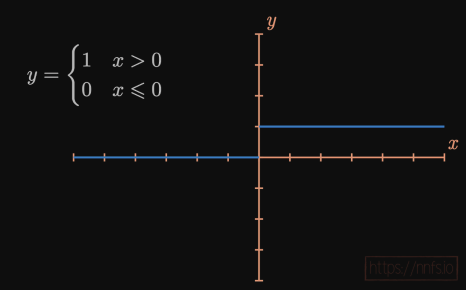

In a single neuron, if the weight * input + bias results in a value greater than 0, the neuron will fire and output a 1; otherwise, it will output a 0

# 2.0 Linear Activation Function

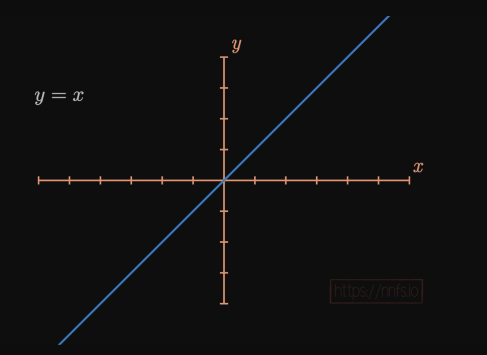

- The linear activation function is the simplest activation function. 
- It is defined as f(x) = x. The output of the linear activation function is the same as the input. 
- This activation function is used in the output layer of regression models.

# 3.0 Sigmoid Activation Function

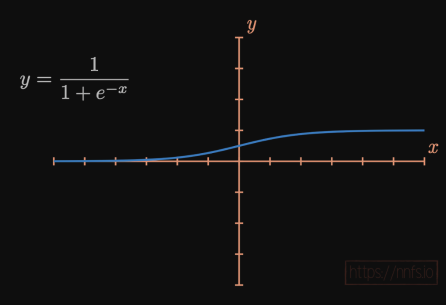

- The problem with a step function is it’s either on (1) or off (0). It’s hard to tell how “close” this step function was to activating or deactivating
- For example, an input of 3 will output the same value as an input of 300,000 which is output1

- The sigmoid activation function is defined as f(x) = 1 / (1 + e^-x). 
- The output of the sigmoid activation function is in the range of 0 for negative infinity, through 0.5 for x = 0, and 1 for positive infinity.
- This activation function is used in the output layer of binary classification models.


# 4.0 ReLU Activation Function

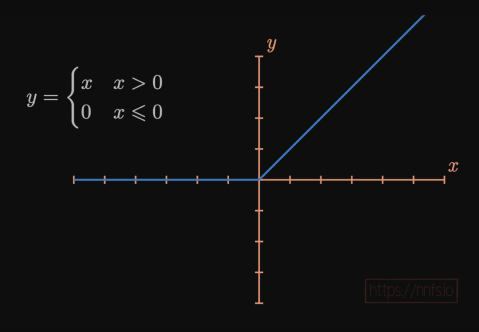



# Why Used ReLU Activation Functions?

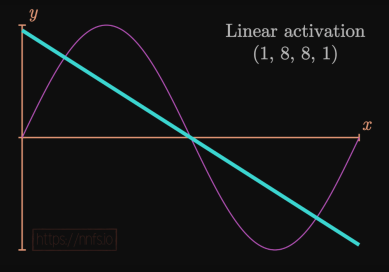 to 
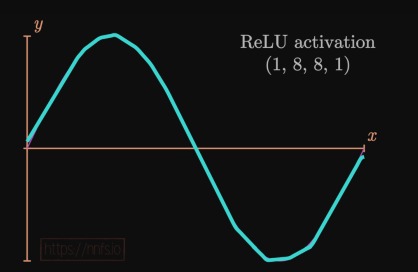

- Activation functions are used to introduce non-linearity into the output of a neuron.
- So we can bent the output of a neuron in a way that we can decide if the neuron should be activated or not.
- Without activation functions, the output of a neural network would be linear, which would make the neural network useless for most tasks.

### 4.1 For loop

In [1]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

outputs = []

for i in inputs:
    if i > 0:
        outputs.append(i)
    else:
        outputs.append(0)

print(outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


### 4.2 Max function

In [2]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

outputs = []

for i in inputs:
    outputs.append(max(0,i))

print(outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


### 4.3 Numpy maximum function

In [3]:
import numpy as np

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

outputs = np.maximum(0, inputs)

print(outputs)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


### 4.4 Activation Relu Class

In [4]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [5]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [6]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init() 

X, y = spiral_data(samples=100, classes=3)

In [7]:
dense1 = Layer_Dense(2, 3)

activation1 = Activation_ReLU()

dense1.forward(X)

activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


# 5.0 Softmax Activation Function

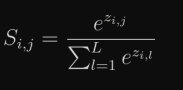

- Normalizes the output of a network to a probability distribution over the target classes in a multi-class classification problem.
- To calculate the probabilities, we need non-negative values. 
- Imagine the output as [4.8, 1.21, -2.385] 
- After normalization (divide by sum), the last value will still be negative since we’ll just divide all of them by their sum. 
- A negative probability (or confidence) does not make much sense. 
- An exponential value of any number is always non-negative — it returns 0 for negative infinity, 1 for the input of 0, and increases for positive values

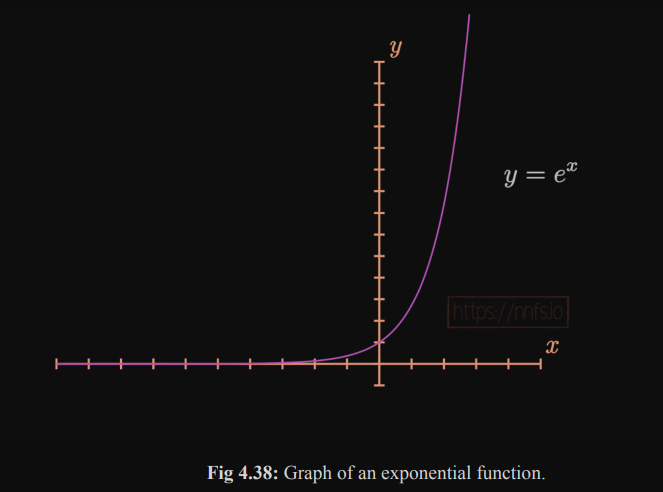

### Exponetial Function

In [10]:
layer_outputs = [4.8, 1.21, -2.385]

E = 2.71828182846 # or math.e

exp_values = []

for i in layer_outputs:
    exp_values.append(E ** i)

print(exp_values)

[121.51041751893969, 3.3534846525504487, 0.09208897957920406]


### Softmax Function

In [12]:
norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value / norm_base)

print(norm_values)
print(sum(norm_values)) # Sum of the values is 1 (100& Probability)

[0.9724257028383375, 0.026837325858959028, 0.0007369713027034477]
1.0


### Numpy Implementation

In [13]:
layer_outputs = [4.8, 1.21, 2.385]

In [14]:
exp_values = np.exp(layer_outputs)
print(exp_values)

[121.51041752   3.35348465  10.85906266]


In [15]:
norm_values = exp_values / np.sum(exp_values)
norm_values

array([0.89528266, 0.02470831, 0.08000903])

In [16]:
np.sum(norm_values)

0.9999999999999999

### axis and keepdims parameters in numpy

In [18]:
import numpy as np
layer_outputs = np.array([[4.8, 1.21, 2.385],
                            [8.9, -1.81, 0.2],
                            [1.41, 1.051, 0.026]])

print(f"Sum without axis : {np.sum(layer_outputs)}")
print(f"Sum with axis = None : {np.sum(layer_outputs, axis=None)}")

Sum without axis : 18.172
Sum with axis = None : 18.172


In [19]:
# axis=0 means sum row-wise, along axis 0

# 4.8+8.9+1.41
print(f"Sum with axis = 0 : {np.sum(layer_outputs, axis = 0)}")

Sum with axis = 0 : [15.11   0.451  2.611]


In [20]:
print(f"Sum with axis = 1 : {np.sum(layer_outputs, axis = 1)}")

Sum with axis = 1 : [8.395 7.29  2.487]


In [22]:
# maintain current shape
# keep sample wise data
print("Sum with axis = 1  and maintain current shape:")
print(np.sum(layer_outputs, axis = 1, keepdims=True))

Sum with axis = 1  and maintain current shape:
[[8.395]
 [7.29 ]
 [2.487]]


### Softmax Class

In [31]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs,axis=1, keepdims=True))
        print(exp_values)
        prob = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        print(prob)
        self.output = prob

In [34]:
softmax = Activation_Softmax()
softmax.forward([[1, 2, 3]])
print(softmax.output)

[[0.13533528 0.36787944 1.        ]]
[[0.09003057 0.24472847 0.66524096]]
[[0.09003057 0.24472847 0.66524096]]


In [25]:
# Why inputs - largest of the inputs before doing exponential
# - to avoid explodign values
import numpy as np
print(np.exp(1))

2.718281828459045


In [24]:
print(np.exp(10))

22026.465794806718


In [27]:
print(np.exp(100))

2.6881171418161356e+43


In [28]:
print(np.exp(1000)) # exploding values


inf


C:\Users\fulim\AppData\Local\Temp\ipykernel_20508\3414507029.py:1: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000))


In [29]:
print(np.exp(-np.inf), np.exp(0))
# We know the exponential function tends toward 0 as its input value approaches negative infinity,
#  and the output is 1 when the input is 0
# Hence, if we divide the input with largest input, we would always get negative value up to 0, as the largest number subtracted by itself return 0


0.0 1.0


# Full Code

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)


# Let's see output of the first few samples:
print(activation2.output[:5])


'''
>>>
[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
'''